In [211]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [213]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [219]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [220]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [221]:
from sklearn.inspection import permutation_importance
from sklearn.utils.validation import check_is_fitted


In [222]:
df = pd.read_csv("C:\\Users\\jithi\\Desktop\\lung_cancer_data.csv")

In [227]:
df.head()

Patient_ID  Age  Gender Smoking_History  Years_Smoked  Pack_Years  \
0           1   69    Male           Never            30           3   
1           2   32  Female          Former             6          61   
2           3   89    Male           Never             2           9   
3           4   78  Female           Never            11          69   
4           5   38    Male          Former            11          57   

   Family_History_Cancer      Occupation  Exposure_to_Toxins Residential_Area  \
0                  False          Farmer               False            Urban   
1                  False   Office Worker               False            Urban   
2                   True   Office Worker                True            Rural   
3                  False  Factory Worker                True            Urban   
4                  False          Farmer               False            Rural   

   ...  Previous_Cancer_Diagnosis  Tumor_Size_cm  Metastasis_Status  \
0  ...                       True          11.02               True   
1  ...                      False          14.29               True   
2  ...                      False           9.47              False   
3  ...                      False           2.22              False   
4  ...                      False           8.26              False   

   Stage_of_Cancer  Treatment_Type  Survival_Years Follow_Up_Visits  \
0              III         Surgery              12               24   
1               II    Chemotherapy               6               12   
2              III    Chemotherapy               6               15   
3               IV    Chemotherapy              13               25   
4              III      Palliative               3                4   

  Medication_Response  Symptom_Progression Year_of_Diagnosis  
0                Good               Stable              2007  
1                Poor               Stable              2009  
2                Good            Worsening              2015  
3            Moderate            Improving              2012  
4                Good               Stable              2014  

[5 rows x 30 columns]

In [229]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Years_Smoked',
       'Pack_Years', 'Family_History_Cancer', 'Occupation',
       'Exposure_to_Toxins', 'Residential_Area', 'BMI',
       'Lung_Function_Test_Result', 'Chest_Pain_Symptoms',
       'Shortness_of_Breath', 'Chronic_Cough', 'Weight_Loss',
       'Physical_Activity_Level', 'Dietary_Habits', 'Air_Quality_Index',
       'Comorbidities', 'Previous_Cancer_Diagnosis', 'Tumor_Size_cm',
       'Metastasis_Status', 'Stage_of_Cancer', 'Treatment_Type',
       'Survival_Years', 'Follow_Up_Visits', 'Medication_Response',
       'Symptom_Progression', 'Year_of_Diagnosis'],
      dtype='object')

In [231]:
df.shape

(300000, 30)

In [233]:
unwanted_columns = ['Patient_ID', 'Occupation', 'Residential_Area']

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 300000 non-null  int64  
 1   Age                        300000 non-null  int64  
 2   Gender                     300000 non-null  object 
 3   Smoking_History            300000 non-null  object 
 4   Years_Smoked               300000 non-null  int64  
 5   Pack_Years                 300000 non-null  int64  
 6   Family_History_Cancer      300000 non-null  bool   
 7   Occupation                 300000 non-null  object 
 8   Exposure_to_Toxins         300000 non-null  bool   
 9   Residential_Area           300000 non-null  object 
 10  BMI                        300000 non-null  float64
 11  Lung_Function_Test_Result  300000 non-null  float64
 12  Chest_Pain_Symptoms        300000 non-null  bool   
 13  Shortness_of_Breath        30

In [237]:
df.isnull().sum()

Patient_ID                       0
Age                              0
Gender                           0
Smoking_History                  0
Years_Smoked                     0
Pack_Years                       0
Family_History_Cancer            0
Occupation                       0
Exposure_to_Toxins               0
Residential_Area                 0
BMI                              0
Lung_Function_Test_Result        0
Chest_Pain_Symptoms              0
Shortness_of_Breath              0
Chronic_Cough                    0
Weight_Loss                      0
Physical_Activity_Level          0
Dietary_Habits                   0
Air_Quality_Index                0
Comorbidities                90376
Previous_Cancer_Diagnosis        0
Tumor_Size_cm                    0
Metastasis_Status                0
Stage_of_Cancer                  0
Treatment_Type                   0
Survival_Years                   0
Follow_Up_Visits                 0
Medication_Response              0
Symptom_Progression 

In [239]:
categorical_cols = ['Gender', 'Smoking_History', 'Occupation', 'Residential_Area',
                    'Physical_Activity_Level', 'Dietary_Habits', 'Comorbidities',
                    'Stage_of_Cancer', 'Treatment_Type', 'Medication_Response', 'Symptom_Progression']

In [241]:
label_encoders = {}
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [243]:
df.head(10)

Patient_ID  Age  Gender  Smoking_History  Years_Smoked  Pack_Years  \
0           1   69       1                2            30           3   
1           2   32       0                1             6          61   
2           3   89       1                2             2           9   
3           4   78       0                2            11          69   
4           5   38       1                1            11          57   
5           6   41       0                0             9          67   
6           7   20       0                0            29           9   
7           8   39       0                2            49          61   
8           9   70       0                2             2          49   
9          10   19       0                1            31          73   

   Family_History_Cancer  Occupation  Exposure_to_Toxins  Residential_Area  \
0                  False           1               False                 2   
1                  False           2               False                 2   
2                   True           2                True                 0   
3                  False           0                True                 2   
4                  False           1               False                 0   
5                  False           3               False                 2   
6                  False           2               False                 0   
7                   True           0                True                 1   
8                  False           2                True                 1   
9                  False           1                True                 0   

   ...  Previous_Cancer_Diagnosis  Tumor_Size_cm  Metastasis_Status  \
0  ...                       True          11.02               True   
1  ...                      False          14.29               True   
2  ...                      False           9.47              False   
3  ...                      False           2.22              False   
4  ...                      False           8.26              False   
5  ...                      False           5.72              False   
6  ...                      False           1.05              False   
7  ...                      False          14.50              False   
8  ...                       True           5.03               True   
9  ...                      False           0.72              False   

   Stage_of_Cancer  Treatment_Type  Survival_Years  Follow_Up_Visits  \
0                2               3              12                24   
1                1               0               6                12   
2                2               0               6                15   
3                3               0              13                25   
4                2               1               3                 4   
5                3               0               1                39   
6                1               0              18                34   
7                0               2              11                26   
8                1               2               3                22   
9                0               0              18                19   

   Medication_Response  Symptom_Progression  Year_of_Diagnosis  
0                    0                    1               2007  
1                    2                    1               2009  
2                    0                    2               2015  
3                    1                    0               2012  
4                    0                    1               2014  
5                    2                    2               2020  
6                    0                    1               2002  
7                    1                    2               2015  
8                    0                    2               2016  
9                    1                    1               2022  

[10 rows x 30 columns]

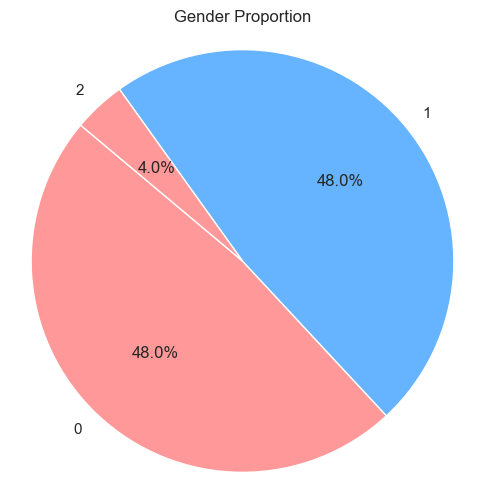

In [246]:
# 2. Gender Proportion - Pie Chart
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title("Gender Proportion")
plt.axis('equal')
plt.show()


C:\Users\jithi\AppData\Local\Temp\ipykernel_24152\2810545437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Smoking_History', order=df['Smoking_History'].value_counts().index, palette="viridis")


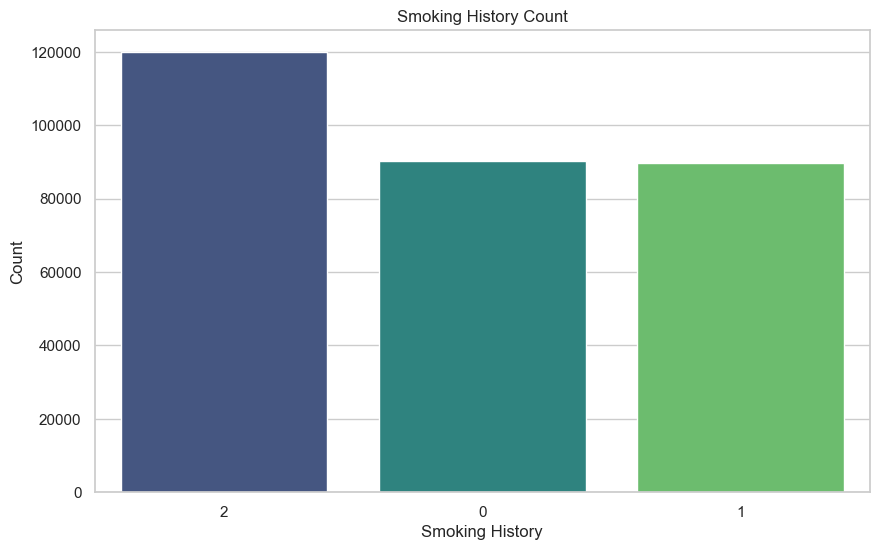

In [248]:
# 3. Smoking History Impact - Bar Chart (Count per category)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Smoking_History', order=df['Smoking_History'].value_counts().index, palette="viridis")
plt.title("Smoking History Count")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.show()

C:\Users\jithi\AppData\Local\Temp\ipykernel_24152\1341073134.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stage_of_Cancer', order=df['Stage_of_Cancer'].value_counts().index, palette="magma")


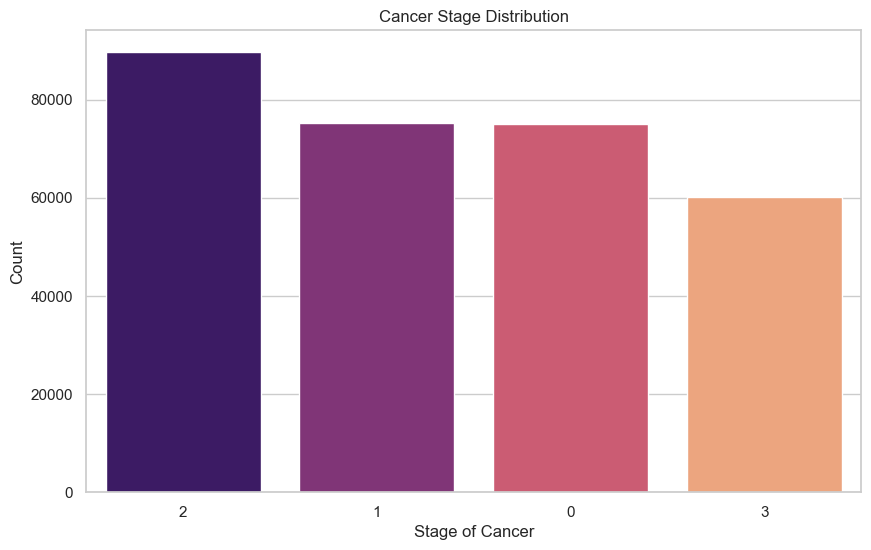

In [250]:
# 4. Cancer Stage Distribution - Bar Chart
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stage_of_Cancer', order=df['Stage_of_Cancer'].value_counts().index, palette="magma")
plt.title("Cancer Stage Distribution")
plt.xlabel("Stage of Cancer")
plt.ylabel("Count")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


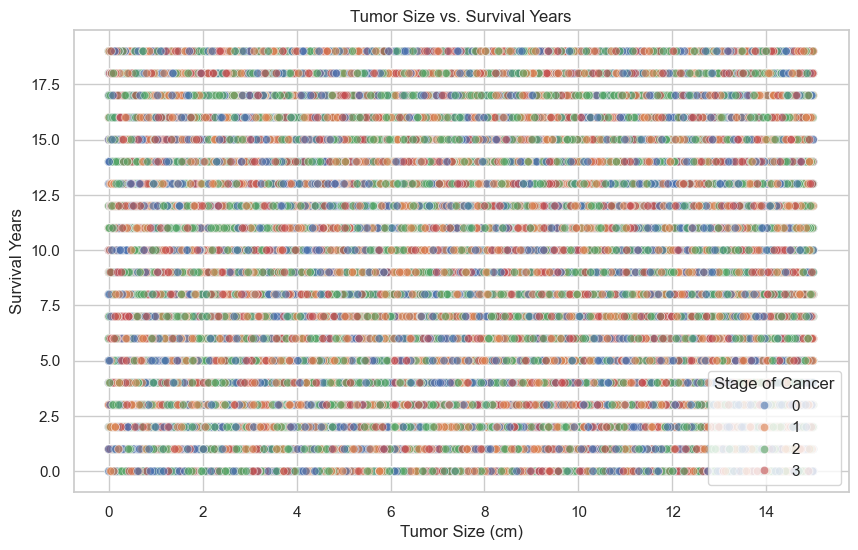

In [252]:
# 5. Tumor Size vs. Survival Years - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tumor_Size_cm', y='Survival_Years', hue='Stage_of_Cancer', palette="deep", alpha=0.6)
plt.title("Tumor Size vs. Survival Years")
plt.xlabel("Tumor Size (cm)")
plt.ylabel("Survival Years")
plt.legend(title="Stage of Cancer")
plt.show()

C:\Users\jithi\AppData\Local\Temp\ipykernel_24152\2124664094.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Metastasis Status")


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

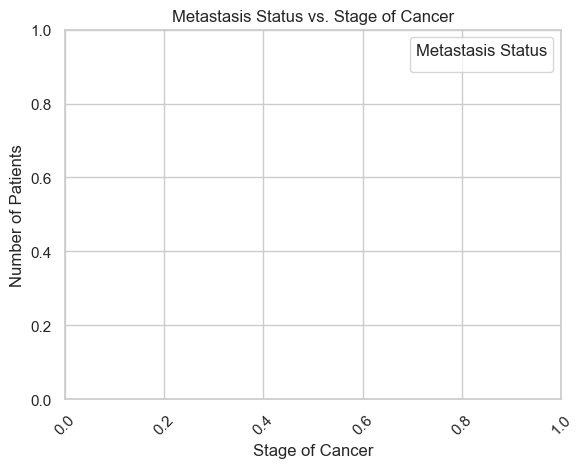

In [253]:
# 6. Metastasis Status vs. Stage of Cancer - Stacked Bar Chart
# Prepare data for stacked bar chart
stack_data = df.groupby(['Stage_of_Cancer', 'Metastasis_Status']).size().unstack(fill_value=0)
stack_data = stack_data.loc[stack_data.sum(axis=1).sort_values(ascending=False).index]
plt.title("Metastasis Status vs. Stage of Cancer")
plt.xlabel("Stage of Cancer")
plt.ylabel("Number of Patients")
plt.legend(title="Metastasis Status")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability


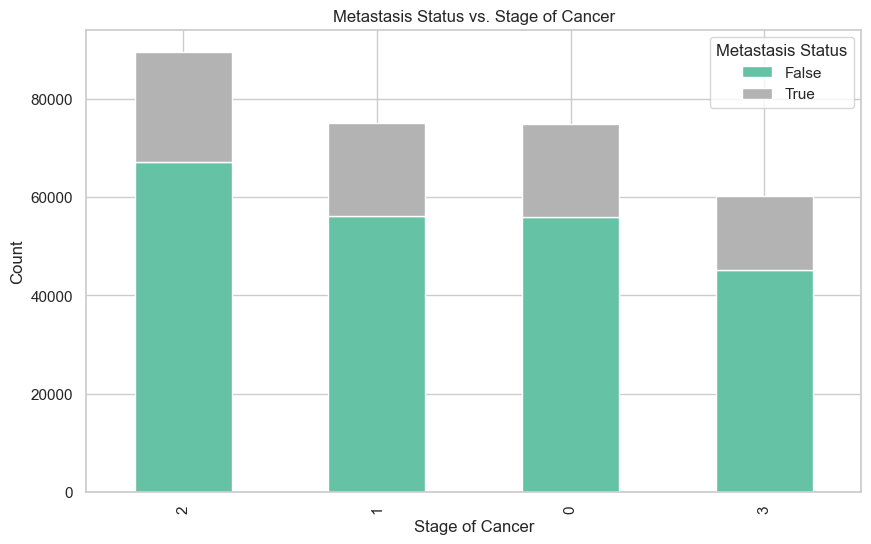

In [254]:
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Metastasis Status vs. Stage of Cancer")
plt.xlabel("Stage of Cancer")
plt.ylabel("Count")
plt.legend(title="Metastasis Status", labels=["False", "True"])
plt.show()

In [256]:
# Display initial info about the dataset
print("Initial Data Information:")
print(df.info())
print("\nMissing Values per Column:")
print(df.isnull().sum())

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 300000 non-null  int64  
 1   Age                        300000 non-null  int64  
 2   Gender                     300000 non-null  int32  
 3   Smoking_History            300000 non-null  int32  
 4   Years_Smoked               300000 non-null  int64  
 5   Pack_Years                 300000 non-null  int64  
 6   Family_History_Cancer      300000 non-null  bool   
 7   Occupation                 300000 non-null  int32  
 8   Exposure_to_Toxins         300000 non-null  bool   
 9   Residential_Area           300000 non-null  int32  
 10  BMI                        300000 non-null  float64
 11  Lung_Function_Test_Result  300000 non-null  float64
 12  Chest_Pain_Symptoms        300000 non-null  bool   
 13  Sho

In [261]:
 #Data Type Conversions
# Ensure boolean columns are of bool type
bool_columns = ['Family_History_Cancer', 'Exposure_to_Toxins', 'Chest_Pain_Symptoms',
                'Shortness_of_Breath', 'Chronic_Cough', 'Weight_Loss',
                'Previous_Cancer_Diagnosis', 'Metastasis_Status']

In [263]:
for col in bool_columns:
    df[col] = df[col].astype(bool)

In [265]:
#Handling Outliers (Example: Tumor_Size_cm)
# You can apply various methods to handle outliers. Here's a simple example using the IQR method:
Q1 = df['Tumor_Size_cm'].quantile(0.25)
Q3 = df['Tumor_Size_cm'].quantile(0.75)
IQR = Q3 - Q1

In [267]:
# Define a threshold for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [269]:
# Option: Cap outliers at the threshold
df['Tumor_Size_cm'] = np.where(df['Tumor_Size_cm'] < lower_bound, lower_bound, df['Tumor_Size_cm'])
df['Tumor_Size_cm'] = np.where(df['Tumor_Size_cm'] > upper_bound, upper_bound, df['Tumor_Size_cm'])


In [271]:
#Feature Engineering (Example: Calculate BMI category)
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

In [273]:
df['BMI_Category'] = df['BMI'].apply(bmi_category)
df['BMI_Category'] = df['BMI_Category'].astype('category')

In [275]:
#Encoding Categorical Variables (Optional: If needed for modeling)
# For example, using one-hot encoding for 'Stage_of_Cancer'
df_encoded = pd.get_dummies(df, columns=['Stage_of_Cancer'], drop_first=True)

In [277]:
# Display cleaned data info
print("\nCleaned Data Information:")
print(df.info())
print("\nSample of Cleaned Data:")
print(df.head())


Cleaned Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Patient_ID                 300000 non-null  int64   
 1   Age                        300000 non-null  int64   
 2   Gender                     300000 non-null  int32   
 3   Smoking_History            300000 non-null  int32   
 4   Years_Smoked               300000 non-null  int64   
 5   Pack_Years                 300000 non-null  int64   
 6   Family_History_Cancer      300000 non-null  bool    
 7   Occupation                 300000 non-null  int32   
 8   Exposure_to_Toxins         300000 non-null  bool    
 9   Residential_Area           300000 non-null  int32   
 10  BMI                        300000 non-null  float64 
 11  Lung_Function_Test_Result  300000 non-null  float64 
 12  Chest_Pain_Symptoms        300000 non-null  b

In [279]:
# Optionally, save the cleaned dataset to a new CSV file
df.to_csv("lung_cancer_data_cleaned.csv", index=False)


In [280]:
#encoding

In [281]:
# List of categorical columns to encode
categorical_columns = [
    'Gender', 'Smoking_History', 'Occupation', 'Residential_Area',
    'Physical_Activity_Level', 'Dietary_Habits', 'Comorbidities',
    'Stage_of_Cancer', 'Treatment_Type', 'Medication_Response', 'Symptom_Progression'
]

In [285]:
# --- Option 1: Label Encoding ---
# This method is useful if the categorical variable is ordinal or if you prefer a single column representation.
df_label_encoded = df.copy()  # make a copy for label encoding
le = LabelEncoder()

In [287]:
df.head(10)

Patient_ID  Age  Gender  Smoking_History  Years_Smoked  Pack_Years  \
0           1   69       1                2            30           3   
1           2   32       0                1             6          61   
2           3   89       1                2             2           9   
3           4   78       0                2            11          69   
4           5   38       1                1            11          57   
5           6   41       0                0             9          67   
6           7   20       0                0            29           9   
7           8   39       0                2            49          61   
8           9   70       0                2             2          49   
9          10   19       0                1            31          73   

   Family_History_Cancer  Occupation  Exposure_to_Toxins  Residential_Area  \
0                  False           1               False                 2   
1                  False           2               False                 2   
2                   True           2                True                 0   
3                  False           0                True                 2   
4                  False           1               False                 0   
5                  False           3               False                 2   
6                  False           2               False                 0   
7                   True           0                True                 1   
8                  False           2                True                 1   
9                  False           1                True                 0   

   ...  Tumor_Size_cm  Metastasis_Status  Stage_of_Cancer  Treatment_Type  \
0  ...          11.02               True                2               3   
1  ...          14.29               True                1               0   
2  ...           9.47              False                2               0   
3  ...           2.22              False                3               0   
4  ...           8.26              False                2               1   
5  ...           5.72              False                3               0   
6  ...           1.05              False                1               0   
7  ...          14.50              False                0               2   
8  ...           5.03               True                1               2   
9  ...           0.72              False                0               0   

   Survival_Years  Follow_Up_Visits  Medication_Response  Symptom_Progression  \
0              12                24                    0                    1   
1               6                12                    2                    1   
2               6                15                    0                    2   
3              13                25                    1                    0   
4               3                 4                    0                    1   
5               1                39                    2                    2   
6              18                34                    0                    1   
7              11                26                    1                    2   
8               3                22                    0                    2   
9              18                19                    1                    1   

   Year_of_Diagnosis  BMI_Category  
0               2007    Overweight  
1               2009   Underweight  
2               2015   Underweight  
3               2012        Normal  
4               2014    Overweight  
5               2020         Obese  
6               2002         Obese  
7               2015        Normal  
8               2016        Normal  
9               2022    Overweight  

[10 rows x 31 columns]

In [289]:
df.describe().transpose()

count           mean           std     min  \
Patient_ID                 300000.0  150000.500000  86602.684716     1.0   
Age                        300000.0      53.450403     20.781058    18.0   
Gender                     300000.0       0.559590      0.571247     0.0   
Smoking_History            300000.0       1.099047      0.831183     0.0   
Years_Smoked               300000.0      24.506443     14.432958     0.0   
Pack_Years                 300000.0      39.528500     23.088920     0.0   
Occupation                 300000.0       1.295797      1.005431     0.0   
Residential_Area           300000.0       1.200630      0.871608     0.0   
BMI                        300000.0      28.008541      6.931694    16.0   
Lung_Function_Test_Result  300000.0      64.954334     20.196922    30.0   
Physical_Activity_Level    300000.0       1.101097      0.700036     0.0   
Dietary_Habits             300000.0       1.000690      0.894591     0.0   
Air_Quality_Index          300000.0     254.393990    141.498432    10.0   
Comorbidities              300000.0       1.504157      1.204423     0.0   
Tumor_Size_cm              300000.0       7.491391      4.323123     0.0   
Stage_of_Cancer            300000.0       1.450267      1.071695     0.0   
Treatment_Type             300000.0       1.399060      1.279715     0.0   
Survival_Years             300000.0       9.502227      5.762411     0.0   
Follow_Up_Visits           300000.0      24.488040     14.434192     0.0   
Medication_Response        300000.0       0.699283      0.780689     0.0   
Symptom_Progression        300000.0       1.200347      0.748583     0.0   
Year_of_Diagnosis          300000.0    2011.998030      7.214658  2000.0   

                                25%        50%        75%       max  
Patient_ID                 75000.75  150000.50  225000.25  300000.0  
Age                           35.00      53.00      71.00      89.0  
Gender                         0.00       1.00       1.00       2.0  
Smoking_History                0.00       1.00       2.00       2.0  
Years_Smoked                  12.00      25.00      37.00      49.0  
Pack_Years                    20.00      40.00      59.00      79.0  
Occupation                     0.00       1.00       2.00       3.0  
Residential_Area               0.00       2.00       2.00       2.0  
BMI                           22.00      28.00      34.00      40.0  
Lung_Function_Test_Result     47.50      64.90      82.50     100.0  
Physical_Activity_Level        1.00       1.00       2.00       2.0  
Dietary_Habits                 0.00       1.00       2.00       2.0  
Air_Quality_Index            132.00     254.00     377.00     499.0  
Comorbidities                  0.00       2.00       3.00       3.0  
Tumor_Size_cm                  3.75       7.49      11.23      15.0  
Stage_of_Cancer                1.00       1.00       2.00       3.0  
Treatment_Type                 0.00       1.00       3.00       3.0  
Survival_Years                 5.00      10.00      14.00      19.0  
Follow_Up_Visits              12.00      24.00      37.00      49.0  
Medication_Response            0.00       0.00       1.00       2.0  
Symptom_Progression            1.00       1.00       2.00       2.0  
Year_of_Diagnosis           2006.00    2012.00    2018.00    2024.0

In [291]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]


In [293]:
corr_matrix = df_numeric.corr()


In [295]:
# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                           Patient_ID       Age  Years_Smoked  Pack_Years  \
Patient_ID                   1.000000  0.002854      0.003214    0.000880   
Age                          0.002854  1.000000     -0.001336    0.000193   
Years_Smoked                 0.003214 -0.001336      1.000000    0.000829   
Pack_Years                   0.000880  0.000193      0.000829    1.000000   
BMI                          0.001240  0.000821      0.004657   -0.000787   
Lung_Function_Test_Result   -0.001593  0.003446     -0.000444   -0.001576   
Air_Quality_Index           -0.001112  0.002600     -0.001888    0.001968   
Tumor_Size_cm               -0.003627 -0.000446      0.000880    0.001209   
Survival_Years              -0.001177  0.001690      0.001789    0.001324   
Follow_Up_Visits             0.004182  0.000560      0.000366   -0.000113   
Year_of_Diagnosis           -0.001076 -0.000903     -0.000185    0.000705   

                                BMI  Lung_Function_Test

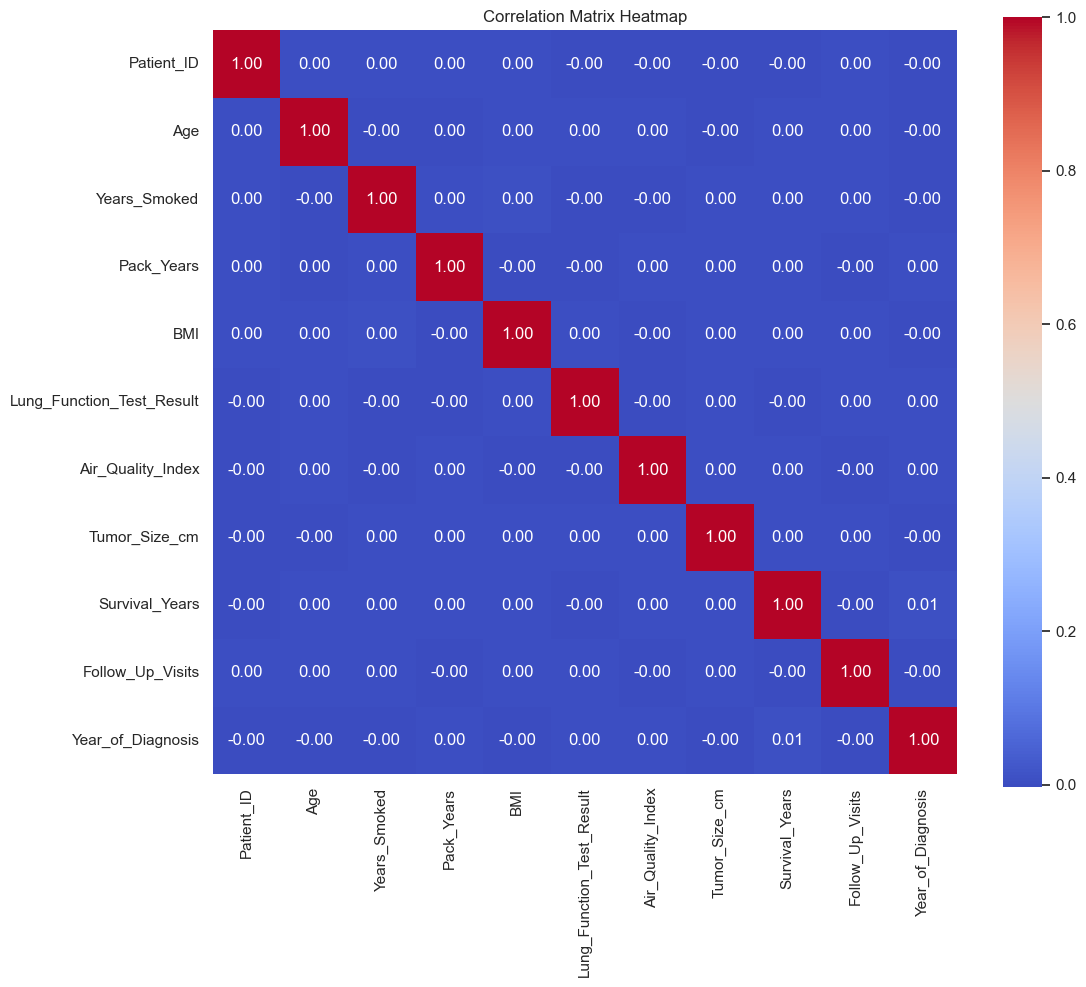

In [297]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Patient_ID                 300000 non-null  int64   
 1   Age                        300000 non-null  int64   
 2   Gender                     300000 non-null  int32   
 3   Smoking_History            300000 non-null  int32   
 4   Years_Smoked               300000 non-null  int64   
 5   Pack_Years                 300000 non-null  int64   
 6   Family_History_Cancer      300000 non-null  bool    
 7   Occupation                 300000 non-null  int32   
 8   Exposure_to_Toxins         300000 non-null  bool    
 9   Residential_Area           300000 non-null  int32   
 10  BMI                        300000 non-null  float64 
 11  Lung_Function_Test_Result  300000 non-null  float64 
 12  Chest_Pain_Symptoms        300000 non-null  bool    
 13  Shortness_of_B

In [302]:
#Prepare data for predictive modeling

In [304]:
bool_columns = [
    'Family_History_Cancer', 'Exposure_to_Toxins', 'Chest_Pain_Symptoms',
    'Shortness_of_Breath', 'Chronic_Cough', 'Weight_Loss',
    'Previous_Cancer_Diagnosis', 'Metastasis_Status'
]

In [306]:
for col in bool_columns:
    df[col] = df[col].astype(bool)

In [308]:
# Remove non-predictive columns 

In [310]:
df_model = df.drop(columns=['Patient_ID', 'Year_of_Diagnosis'])

In [312]:
# Specify the target variable (predicting Survival_Years)
target = 'Survival_Years'
X = df_model.drop(columns=[target])
y = df_model[target]

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [316]:
X_test.shape

(90000, 28)

In [318]:
target = 'Metastasis_Status'
# Drop columns that are not features (e.g., identifiers)


In [320]:
X = df.drop(columns=['Patient_ID', 'Year_of_Diagnosis', target])
y = df[target]

In [322]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [324]:
OneHotEncoder(drop='first', sparse_output=False)


OneHotEncoder(drop='first', sparse_output=False)

In [326]:
numeric_features = ['Age', 'Years_Smoked', 'Pack_Years', 'BMI', 
                    'Lung_Function_Test_Result', 'Air_Quality_Index', 
                    'Tumor_Size_cm', 'Survival_Years', 'Follow_Up_Visits']


In [328]:
categorical_features = ['Gender', 'Smoking_History', 'Occupation', 
                        'Residential_Area', 'Physical_Activity_Level', 
                        'Dietary_Habits', 'Comorbidities', 'Stage_of_Cancer', 
                        'Treatment_Type', 'Medication_Response', 'Symptom_Progression']



In [330]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)


In [332]:
estimator = RandomForestClassifier(random_state=42)  # Change to LogisticRegression(max_iter=1000) if desired

In [334]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(max_iter=1000))
])


In [336]:
pipeline.fit(X_train, y_train)

# Make predictions and evaluate the model.
y_pred = pipeline.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[45037     0]
 [14963     0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.75      1.00      0.86     45037
        True       0.00      0.00      0.00     14963

    accuracy                           0.75     60000
   macro avg       0.38      0.50      0.43     60000
weighted avg       0.56      0.75      0.64     60000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [337]:
#RandomForestClassifier

In [389]:
X = df.drop(columns=['Patient_ID', 'Year_of_Diagnosis', 'Metastasis_Status'])
y = df['Metastasis_Status']

In [391]:
# 4. Split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l2'],            
}

In [ ]:
pipeline.set_params(classifier=LogisticRegression())

In [ ]:


grid = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid.fit(X_train, y_train)

In [ ]:
#Decision Tree Classifier

In [ ]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 7, 11],
    'max_depth': [None, 5, 10]
}

In [ ]:
grid_dtc = GridSearchCV(dtc, param_grid, cv=3, verbose=2)
grid_dtc.fit(X_train, y_train)

In [ ]:
#K-Nearest Neighbor

In [ ]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

In [ ]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

In [ ]:
knn_accuracy  = accuracy_score(y_test, y_pred_knn)
print(f"accuracy of knn model:{knn_accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred_knn))
confusion_matrix(y_test, y_pred_knn)

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=9)
}


In [ ]:
# Train models
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

forest = RandomForestClassifier()
forest.fit(X_train, y_train)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

# Make sure the predictions exist!
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_dtc = model_dtc.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
forest_accuracy = accuracy_score(y_test, y_pred_rf)
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
knn_accuracy = accuracy_score(y_test, y_pred_knn)


In [ ]:
print("Logistic regression models' average accuracy:", np.mean(accuracy_lr))

In [ ]:
print("Random forest models' average accuracy:", np.mean(forest_accuracy))

In [ ]:
print("Decision tree models' average accuracy:", np.mean(dtc_accuracy))

In [ ]:
print("KNN models' average accuracy:", np.mean(knn_accuracy))